# Support Vector Machines with scikit-learn

- SVMs are supervised machine learning models used for classification.
- An SVM uses support vectors to define a decision boundary. Classifications are made by comparing unlabeled points to that decision boundary.
- Support vectors are the points of each class closest to the decision boundary. The distance between the support vectors and the decision boundary is called the margin.
- SVMs attempt to create the largest margin possible while staying within an acceptable amount of error.
- The C parameter controls how much error is allowed. A large C allows for little error and creates a hard margin. A small C allows for more error and creates a soft margin.
- SVMs use kernels to classify points that aren’t linearly separable.
- Kernels transform points into higher dimensional space. A polynomial kernel transforms points into three dimensions while an rbf kernel transforms points into infinite dimensions.
- An rbf kernel has a gamma parameter. If gamma is large, the training data is more relevant, and as a result overfitting can occur.

In [26]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
    


An optimal decision boundary is the one that maximizes the margin between different classes. SVM finds this boundary by minimizing classification errors while maximizing the margin between the closest data points.
    

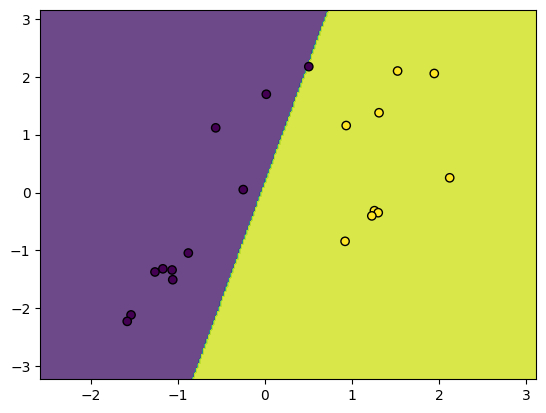

In [27]:

# Load example dataset with 2 informative features
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with linear kernel
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_scaled, y_train)

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.show()

plot_decision_boundary(X_test_scaled, y_test, svm_clf)
    


Support vectors are the points closest to the decision boundary, and the margin is the distance between these vectors and the boundary.
    

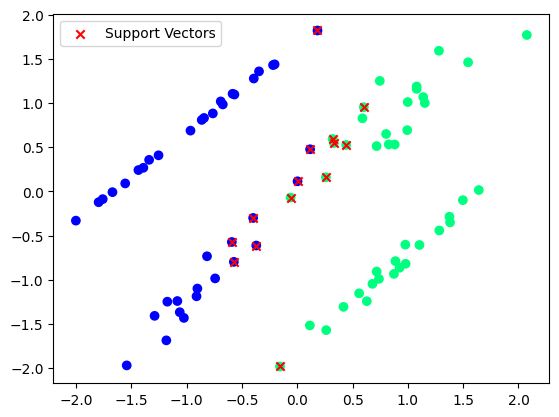

In [28]:

# Support vectors
support_vectors = svm_clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='winter')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red', marker='x', label='Support Vectors')
plt.legend()
plt.show()
    


Outliers can affect SVM performance by pulling the decision boundary, reducing the margin.
    

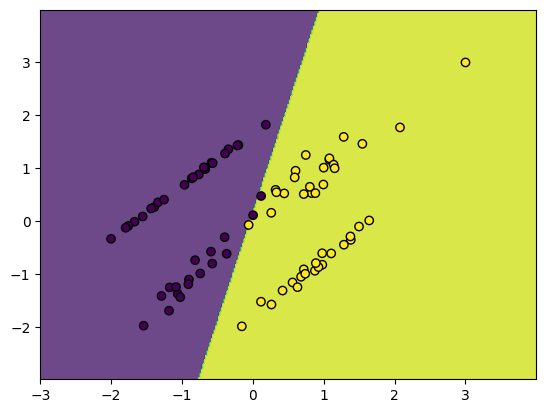

In [29]:

# Adding an outlier
X_train_outlier = np.vstack([X_train_scaled, [3, 3]])
y_train_outlier = np.hstack([y_train, 1])

# Train the SVM model again
svm_clf_outlier = SVC(kernel='linear')
svm_clf_outlier.fit(X_train_outlier, y_train_outlier)

# Plot decision boundary with outlier
plot_decision_boundary(X_train_outlier, y_train_outlier, svm_clf_outlier)
    


Kernels allow SVMs to handle non-linear decision boundaries by transforming the data into higher-dimensional spaces. Popular kernels include the polynomial and radial basis function (RBF) kernels.
    

In [30]:

# Train SVM with polynomial kernel
svm_clf_poly = SVC(kernel='poly', degree=3)
svm_clf_poly.fit(X_train_scaled, y_train)

# Train SVM with RBF kernel
svm_clf_rbf = SVC(kernel='rbf')
svm_clf_rbf.fit(X_train_scaled, y_train)
    

SVC()


The polynomial kernel transforms the data into a higher-dimensional space to separate the classes with a linear decision boundary.
    

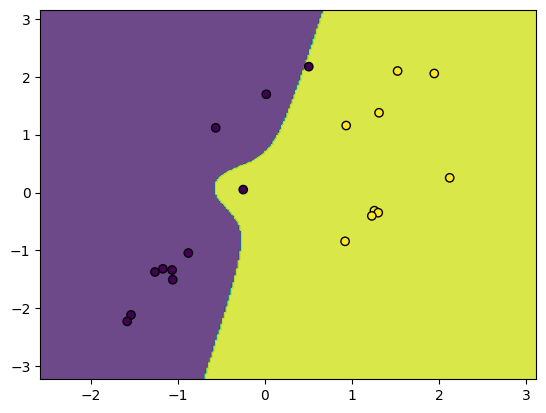

In [31]:

# Plot decision boundary for polynomial kernel
plot_decision_boundary(X_test_scaled, y_test, svm_clf_poly)
    


The RBF kernel maps the data into an infinite-dimensional space, allowing for more flexible decision boundaries.
    

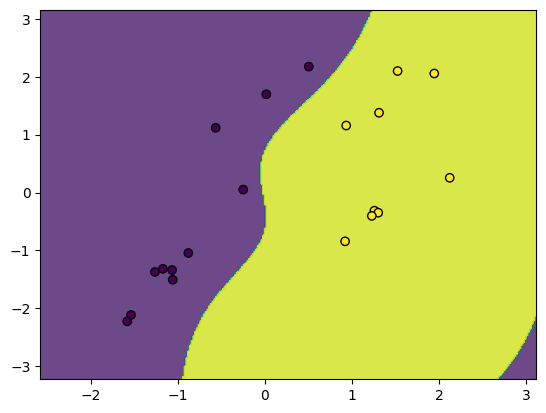

In [32]:

# Plot decision boundary for RBF kernel
plot_decision_boundary(X_test_scaled, y_test, svm_clf_rbf)
    


Finally, we can review the model's performance using accuracy as a metric.
    

In [33]:

# Evaluate accuracy for different kernels
accuracy_linear = svm_clf.score(X_test_scaled, y_test)
accuracy_poly = svm_clf_poly.score(X_test_scaled, y_test)
accuracy_rbf = svm_clf_rbf.score(X_test_scaled, y_test)

print(f'Linear Kernel Accuracy: {accuracy_linear}')
print(f'Polynomial Kernel Accuracy: {accuracy_poly}')
print(f'RBF Kernel Accuracy: {accuracy_rbf}')
    

Linear Kernel Accuracy: 0.95
Polynomial Kernel Accuracy: 0.9
RBF Kernel Accuracy: 1.0
